In [ ]:
# 1. Import essential libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
# Display plots inline in Jupyter Notebook
%matplotlib inline  
# Import machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree model
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation metrics
import joblib  # For saving trained models


In [ ]:
# 2. Load the dataset from the data folder
df = pd.read_csv("../data/world_population.csv")

# Display dataset structure and summary information
print(df.info())  # Get column details, data types, and non-null counts
df.head()  # Display first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [29]:
#3. Handle Missing Values
# Check for missing values in the dataset
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values in numeric columns with their mean values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing values in categorical columns with their most frequent values (mode)
df.fillna(df.mode().iloc[0], inplace=True)

# Verify that missing values are handled
print("Missing values after handling:\n", df.isnull().sum())


Missing values before handling:
 Rank                           0
Country/Territory              0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
Continent_Africa               0
Continent_Asia                 0
Continent_Europe               0
Continent_North America        0
Continent_Oceania              0
Continent_South America        0
dtype: int64
Missing values after handling:
 Rank                           0
Country/Territory              0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                

In [21]:
# 4. Convert Categorical Data
#  Drop columns that are not required for analysis
df.drop(["CCA3", "Capital"], axis=1, inplace=True)

# Convert categorical "Continent" column into numerical format using One-Hot Encoding
df = pd.get_dummies(df, columns=["Continent"], drop_first=False)

# Display updated dataset information
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country/Territory            234 non-null    object 
 2   2022 Population              234 non-null    int64  
 3   2020 Population              234 non-null    int64  
 4   2015 Population              234 non-null    int64  
 5   2010 Population              234 non-null    int64  
 6   2000 Population              234 non-null    int64  
 7   1990 Population              234 non-null    int64  
 8   1980 Population              234 non-null    int64  
 9   1970 Population              234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  Growth Rate                  234 non-null    float64
 13  World Population Per

,Rank,Country/Territory,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,36,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,False,True,False,False,False,False
1,138,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,False,False,True,False,False,False
2,34,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,True,False,False,False,False,False
3,213,American Samoa,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,False,False,False,False,True,False
4,203,Andorra,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,False,False,True,False,False,False


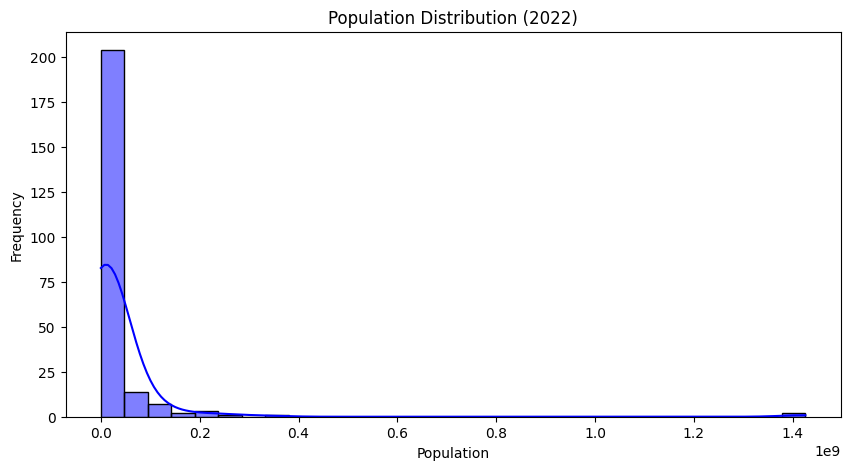

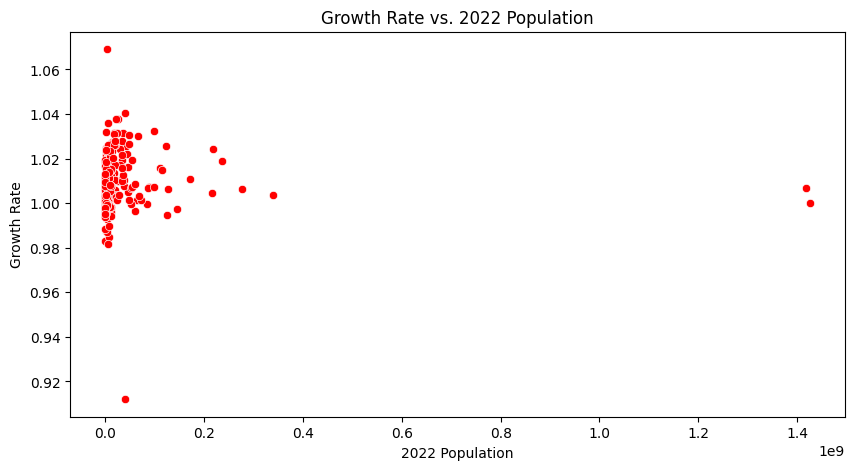

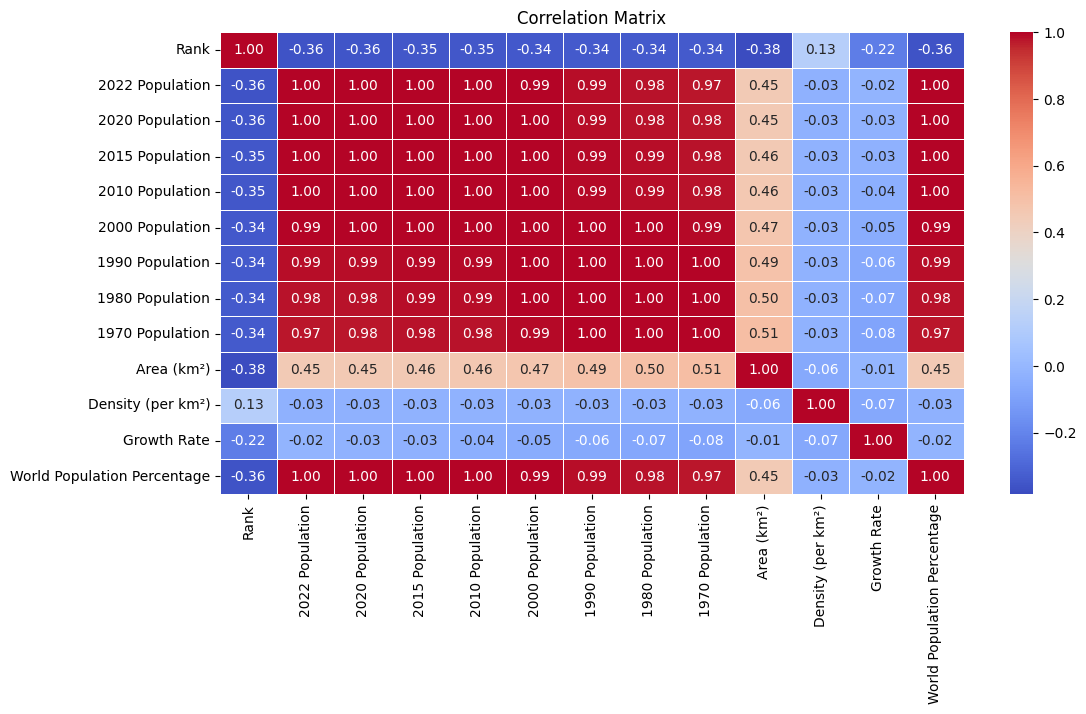

In [23]:
# 5. Exploratory Data Analysis (EDA)

# Population Distribution
# Plot the distribution of the 2022 population
plt.figure(figsize=(10, 5))
sns.histplot(df["2022 Population"], bins=30, kde=True, color="blue")
plt.title("Population Distribution (2022)")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

# Growth Rate vs. Population
# Scatter plot to show relationship between Population and Growth Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["2022 Population"], y=df["Growth Rate"], color="red")
plt.title("Growth Rate vs. 2022 Population")
plt.xlabel("2022 Population")
plt.ylabel("Growth Rate")
plt.show()

# Correlation Heatmap
# Plot a heatmap to show correlation between numerical variables
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [24]:
#6. Feature Selection & Model Training

# Define independent variables (features) and dependent variable (target)
X = df.drop(["Country/Territory", "2022 Population"], axis=1)  # Features
y = df["2022 Population"]  # Target variable

# Split the dataset into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes of training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (163, 18)
Testing set shape: (71, 18)


In [25]:
# 7. Machine Learning Model Training

# Train Linear Regression Model
# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate model performance
print("Linear Regression - R2 Score:", r2_score(y_test, y_pred_lin))
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))


# Train Decision Tree Regressor
# Initialize and train the Decision Tree model
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluate model performance
print("Decision Tree - R2 Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree - Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))


#Train Random Forest Regressor
# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate model performance
print("Random Forest - R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest - Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))


#Train Support Vector Regressor (SVR)
# Initialize and train the Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate model performance
print("SVR - R2 Score:", r2_score(y_test, y_pred_svr))
print("SVR - Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))



Linear Regression - R2 Score: 0.9999509391020099
Linear Regression - Mean Squared Error: 188475799241.22516
Decision Tree - R2 Score: 0.9140240900407973
Decision Tree - Mean Squared Error: 330291107764305.56
Random Forest - R2 Score: 0.9642514828683507
Random Forest - Mean Squared Error: 137334019842844.08
SVR - R2 Score: -0.22110885475851227
SVR - Mean Squared Error: 4691097733427607.0


In [26]:
# 8. Save Trained Models & Predictions

# Save trained models to the models directory
joblib.dump(lin_reg, "../models/linear_regression.pkl")
joblib.dump(dt_reg, "../models/decision_tree.pkl")
joblib.dump(rf_reg, "../models/random_forest.pkl")
joblib.dump(svr, "../models/svr.pkl")

# Save predictions as a CSV file
predictions_df = pd.DataFrame({
    "Actual": y_test,
    "Linear_Predicted": y_pred_lin,
    "DecisionTree_Predicted": y_pred_dt,
    "RandomForest_Predicted": y_pred_rf,
    "SVR_Predicted": y_pred_svr
})

predictions_df.to_csv("../data/predictions.csv", index=False)
print("Predictions saved successfully!")



Predictions saved successfully!


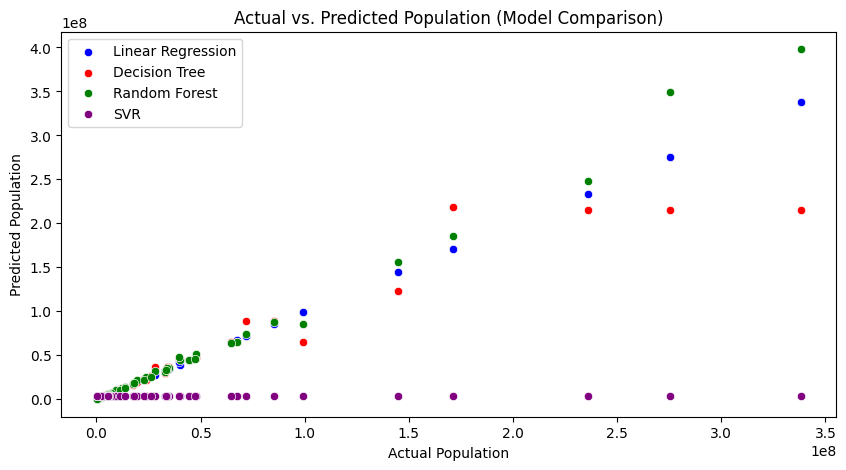

In [27]:
# 9. Visualize Model Predictions

# Plot actual vs predicted values for all models
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_lin, label="Linear Regression", color="blue")
sns.scatterplot(x=y_test, y=y_pred_dt, label="Decision Tree", color="red")
sns.scatterplot(x=y_test, y=y_pred_rf, label="Random Forest", color="green")
sns.scatterplot(x=y_test, y=y_pred_svr, label="SVR", color="purple")
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs. Predicted Population (Model Comparison)")
plt.legend()
plt.show()


In [28]:
# End 

print("\nProject Completed! ✅ The processed dataset has been saved as 'predictions.csv'.")



Project Completed! ✅ The processed dataset has been saved as 'predictions.csv'.
